In [34]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as st
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'kmodes'

In [5]:
data = pd.read_csv("K:\Summer2020\Prep\Final Project\Crimes_-one_year.csv")

In [6]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11513103,JB523713,11/21/2018 12:01:00 AM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,29.0,25.0,08B,1139293.0,1900198.0,2018,11/28/2018 04:22:08 PM,41.882255,-87.763979,"(41.882255056, -87.763979052)"
1,11513771,JB524444,11/21/2018 12:01:00 AM,081XX S GREEN ST,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,21.0,71.0,07,1172055.0,1850867.0,2018,11/28/2018 04:22:08 PM,41.746226,-87.645128,"(41.746226472, -87.645127655)"
2,11514323,JB525264,11/21/2018 12:01:00 AM,048XX W HARRISON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,29.0,25.0,02,1144236.0,1896898.0,2018,11/28/2018 04:22:08 PM,41.873108,-87.745911,"(41.873108029, -87.745911038)"
3,11518709,JB531164,11/21/2018 12:01:00 AM,0000X S MICHIGAN AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESTAURANT,False,True,...,42.0,32.0,26,1177317.0,1900258.0,2018,11/30/2018 04:07:47 PM,41.881643,-87.624353,"(41.881642592, -87.624353482)"
4,11513448,JB523986,11/21/2018 12:03:00 AM,057XX S ARTESIAN AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,...,16.0,63.0,26,1161015.0,1866624.0,2018,11/28/2018 04:22:08 PM,41.789701,-87.685146,"(41.789701125, -87.685145711)"


In [8]:
data.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     957
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      12
Community Area             3
FBI Code                   0
X Coordinate            2153
Y Coordinate            2153
Year                       0
Updated On                 0
Latitude                2153
Longitude               2153
Location                2153
dtype: int64

In [14]:
#Consider the column community area - check for nulls and zero values
data[data['Community Area'] == 0]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
86662,11641958,JC207297,04/01/2019 07:10:00 AM,007XX W OHARE ST,0560,ASSAULT,SIMPLE,STREET,False,False,...,NaN,0.0,08A,1094587.0,1945065.0,2019,04/08/2019 04:19:35 PM,42.006074,-87.927365,"(42.006074109, -87.927364891)"
136428,11716434,JC298794,06/08/2019 10:00:00 AM,056XX N FAIRVIEW AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,NaN,0.0,11,1119964.0,1936805.0,2019,06/30/2019 03:56:27 PM,41.983040,-87.834174,"(41.983039612, -87.834174276)"


In [15]:
data_clean = data.drop(data[data['Community Area'] == 0].index)
data_clean=data_clean.drop(data_clean[data_clean['Community Area'].isnull()].index)

In [20]:
data_clean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [19]:
#Clean and remove rest of the null values in the data set
data_clean=data_clean.drop(data_clean[data_clean['X Coordinate'].isnull()].index)
data_clean=data_clean.drop(data_clean[data_clean['Ward'].isnull()].index)
data_clean=data_clean.drop(data_clean[data_clean['Location Description'].isnull()].index)

In [28]:
#Upon analysis, we can eliminate columns like Id, Location and Year
data_clean=data_clean.drop(['Location','Year','ID', 'Updated On'], axis=1)

In [23]:
data_clean.shape

(255352, 19)

In [24]:
#duplicate rows
ids= data_clean['Case Number']
data_clean[ids.isin(ids[ids.duplicated()])]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude
192,JB523961,11/21/2018 10:10:00 AM,066XX S LOWE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,723,7,6.0,68.0,01A,1173182.0,1860838.0,03/18/2019 04:08:09 PM,41.773563,-87.640704
198,JB523961,11/21/2018 10:22:00 AM,066XX S LOWE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,723,7,6.0,68.0,01A,1173182.0,1860838.0,03/18/2019 04:08:09 PM,41.773563,-87.640704
20445,JB560410,12/19/2018 09:40:00 PM,066XX S OAKLEY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,832,8,16.0,66.0,01A,1162216.0,1860573.0,03/19/2019 04:11:22 PM,41.773071,-87.680910
20446,JB560410,12/19/2018 09:40:00 PM,066XX S OAKLEY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,832,8,16.0,66.0,01A,1162216.0,1860573.0,03/19/2019 04:11:22 PM,41.773071,-87.680910
30543,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,224,2,3.0,38.0,01A,1178455.0,1871575.0,03/19/2019 04:11:22 PM,41.802909,-87.621048
30544,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,224,2,3.0,38.0,01A,1178455.0,1871575.0,03/19/2019 04:11:22 PM,41.802909,-87.621048
49512,JC138307,02/03/2019 02:34:00 AM,009XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,323,3,8.0,69.0,01A,1183963.0,1855484.0,03/19/2019 04:11:22 PM,41.758626,-87.601351
49514,JC138307,02/03/2019 02:40:00 AM,009XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,323,3,8.0,69.0,01A,1183963.0,1855484.0,03/19/2019 04:11:22 PM,41.758626,-87.601351
87178,JC208229,04/01/2019 08:29:00 PM,007XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1131,11,24.0,25.0,01A,1144511.0,1896107.0,04/08/2019 04:19:35 PM,41.870932,-87.744921
87188,JC208229,04/01/2019 08:50:00 PM,007XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1131,11,24.0,25.0,01A,1144511.0,1896107.0,04/08/2019 04:19:35 PM,41.870932,-87.744921


In [26]:
data_clean.drop_duplicates(subset="Case Number", keep='first', inplace=True)

In [29]:
data_clean.Date=pd.to_datetime(data_clean.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [37]:
data_clean['Month']=data_clean['Date'].dt.month
data_clean['Hour']=data_clean['Date'].dt.hour
data_clean['Day Name']=data_clean['Date'].dt.day_name()
data_clean['Minute']=data_clean['Date'].dt.minute
data_clean['Day']=data_clean['Date'].dt.day

In [38]:
def custom_season(month):
    if month == 3 or month == 4 or month == 5:
        return 'SPRING' 
    elif month == 6 or month == 7 or month == 8:
        return 'SUMMER'
    elif month == 9 or month == 10 or month == 11:
        return 'FALL'
    else:
        return 'WINTER'


In [39]:
data_clean['Season']=data_clean.apply(lambda x: custom_season(x['Month']),axis=1)

In [40]:
def custom_interval(hour):
    if hour >= 5 and hour < 12:
        return 'MORNING' 
    elif hour >= 12 and hour < 17:
        return 'AFTERNOON'
    elif hour >= 17 and hour < 21:
        return 'EVENING'
    else:
        return 'NIGHT'
data_clean['Day Interval']=data_clean.apply(lambda x: custom_interval(x['Hour']),axis=1)

In [41]:
data_clean['Community Area']=data_clean['Community Area'].astype('int64',copy=False)
data_clean['Community Area']=data_clean['Community Area'].astype('category',copy=False)

In [43]:
#Creating a column for Chicago side derived from community area code
#if keyword in ["and", "del", "from", "lambda"]:
#    print("{} is a keyword").format(keyword)
def custom_side(code):
    if code in [76,9,10,11,12,13,14,1,2,3,4,77]:
        return 'FAR NORTH' 
    elif code in [15,16,17,18,19,20]:
        return 'NORTHWEST'
    elif code in [5,6,7,21,22]:
        return 'NORTH'
    elif code in [23,24,25,26,27,28,29,30,31]:
        return 'WEST'
    elif code in [8,32,33]:
        return 'CENTRAL'
    elif code in [60,34,35,36,37,38,39,40,41,42,43,69]:
        return 'SOUTH'
    elif code in [56,57,58,59,61,62,63,64,65,66,67,68]:
        return 'SOUTHWEST'
    elif code in [70,71,72,73,74,75]:
        return 'FAR SOUTHWEST'
    else:
        return 'FAR SOUTHEAST'
data_clean['Chicago Side']=data_clean.apply(lambda x: custom_side(x['Community Area']),axis=1)

In [44]:
#eliminating unnecessary columns
data_clean=data_clean.drop(['Month'], axis=1)
data_clean=data_clean.drop(['Hour'], axis=1)
data_clean=data_clean.drop(['Date'], axis=1)
data_clean=data_clean.drop(['Day'], axis=1)
data_clean.shape

(255329, 23)

In [47]:
data_clean['Arrest']=data_clean['Arrest'].astype('int64')
data_clean['Domestic']=data_clean['Domestic'].astype('int64')

In [48]:
#grouping the valueso of crime to reduce dimensionality
def custom_side(crime):
    if crime in ['ASSAULT', 'BATTERY','CRIM SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING','ROBBERY']:
        return 'VIOLENT CRIME' 
    elif crime in ['ARSON','BURGLARY','MOTOR VEHICLE THEFT','THEFT','CRIMINAL DAMAGE', 'CRIMINAL TRESPASS']:
        return 'PROPERTY CRIME'
    elif crime in ['GAMBLING','OBSCENITY','NARCOTICS','PROSTITUTION']:
        return 'VICE'
    elif crime in ['DECEPTIVE PRACTICE']:
        return 'DECEPTIVE PRACTICE'
    elif crime in ['INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION','PUBLIC INDECENCY','SEX OFFENSE','HUMAN TRAFFICKING','STALKING']:
        return 'PUBLIC/SEX/ABUSE OFFENSE'
    elif crime in ['LIQUOR LAW VIOLATION','OTHER NARCOTIC VIOLATION','CONCEALED CARRY LICENSE VIOLATION','WEAPONS VIOLATION']:
        return 'ILLEGAL AND UNLICENSED OFFENSE'
    else:
        return 'OTHERS'
data_clean['Crime Type']=data_clean.apply(lambda x: custom_side(x['Primary Type']),axis=1)

In [50]:
#Grouping the Location Description to fewer groups
change_values = {'APARTMENT' : 'RESIDENTIAL', 'RESIDENCE' : 'RESIDENTIAL', 'CHA APARTMENT' : 'RESIDENTIAL', 'RESIDENCE-GARAGE' : 'RESIDENTIAL', 'RESIDENTIAL YARD (FRONT/BACK)' : 'RESIDENTIAL', 'VEHICLE NON-COMMERCIAL' : 'TRANSPORTATION', 'RESIDENCE PORCH/HALLWAY' : 'RESIDENTIAL', 'HOTEL/MOTEL' : 'PRIVATE', 'NURSING HOME/RETIREMENT HOME' : 'HEALTH CARE CENTER', 'HOUSE' : 'RESIDENTIAL', 'DRIVEWAY - RESIDENTIAL' : 'RESIDENTIAL', 'POOL ROOM' : 'PRIVATE', 'YARD' : 'RESIDENTIAL', 'COLLEGE/UNIVERSITY GROUNDS' : 'EDUCATIONAL AREA', 'DAY CARE CENTER' : 'PRIVATE', 'COLLEGE/UNIVERSITY RESIDENCE HALL' : 'EDUCATIONAL AREA', 'PORCH' : 'RESIDENTIAL', 'KENNEL' : 'RESIDENTIAL', 'HOTEL' : 'PRIVATE', 'FARM' : 'PRIVATE', 'BASEMENT' : 'PRIVATE', 'GARAGE' : 'PRIVATE', 'TRAILER' : 'RESIDENTIAL',
                'PARKING LOT/GARAGE(NON.RESID.)' : 'PUBLIC', 'STREET' : 'STREET/SIDEWALK', 'SIDEWALK' : 'STREET/SIDEWALK', 'CURRENCY EXCHANGE' : 'PRIVATE', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP' : 'PUBLIC', 'BAR OR TAVERN' : 'PRIVATE', 'CTA TRAIN' : 'TRANSPORTATION', 'POLICE FACILITY/VEH PARKING LOT' : 'GOVERNMENT AGENCY AREA', 'ALLEY' : 'RISKY AREA', 'CTA BUS' : 'TRANSPORTATION', 'SCHOOL, PUBLIC, BUILDING' : 'EDUCATIONAL AREA', 'CTA BUS STOP' : 'PUBLIC', 'GOVERNMENT BUILDING/PROPERTY' : 'GOVERNMENT AGENCY AREA', 'PARK PROPERTY' : 'PUBLIC', 'CTA STATION' : 'PUBLIC', 'CTA PLATFORM' : 'PUBLIC', 'BRIDGE' : 'PUBLIC', 'CTA GARAGE / OTHER PROPERTY' : 'PRIVATE', 'CTA TRACKS - RIGHT OF WAY' : 'RISKY AREA', 'LIBRARY' : 'PUBLIC', 'ABANDONED BUILDING' : 'RISKY AREA', 'SCHOOL, PUBLIC, GROUNDS' : 'EDUCATIONAL AREA', 'FEDERAL BUILDING' : 'GOVERNMENT AGENCY AREA', 'FIRE STATION' : 'GOVERNMENT AGENCY AREA', 'STAIRWELL' : 'PUBLIC', 'LAKEFRONT/WATERFRONT/RIVERBANK' : 'PUBLIC', 'FOREST PRESERVE' : 'PUBLIC', 'CTA "L" PLATFORM' : 'PUBLIC',
                'RESTAURANT' : 'PRIVATE', 'GAS STATION' : 'PRIVATE', 'SPORTS ARENA/STADIUM' : 'ENTERTAINMENT PLACES', 'GAS STATION' : 'PRIVATE', 'AUTO / BOAT / RV DEALERSHIP' : 'PRIVATE', 'HOSPITAL BUILDING/GROUNDS' : 'HEALTH CARE CENTER', 'COMMERCIAL / BUSINESS OFFICE' : 'PRIVATE', 'SMALL RETAIL STORE' : 'PRIVATE', 'CONVENIENCE STORE' : 'PRIVATE', 'BANK' : 'PRIVATE', 'AIRPORT PARKING LOT' : 'AIRPORT AREA', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA' : 'AIRPORT AREA', 'ATM (AUTOMATIC TELLER MACHINE)' : 'PUBLIC', 'VEHICLE-COMMERCIAL' : 'PRIVATE', 'DRUG STORE' : 'PRIVATE', 'WAREHOUSE' : 'PRIVATE', 'DEPARTMENT STORE' : 'PRIVATE', 'GROCERY FOOD STORE' : 'PRIVATE', 'ATHLETIC CLUB' : 'PRIVATE', 'TAVERN/LIQUOR STORE' : 'PRIVATE', 'VACANT LOT/LAND' : 'RISKY AREA', 'CAR WASH' : 'PRIVATE', 'MOVIE HOUSE/THEATER' : 'ENTERTAINMENT PLACES', 'CONSTRUCTION SITE' : 'RISKY AREA', 'CHA HALLWAY/STAIRWELL/ELEVATOR' : 'PRIVATE', 'MEDICAL/DENTAL OFFICE' : 'HEALTH CARE CENTER', 'SCHOOL, PRIVATE, GROUNDS' : 'EDUCATIONAL AREA', 'VACANT LOT/LAND' : 'RISKY AREA', 'PAWN SHOP' : 'PRIVATE', 'BARBERSHOP' : 'PRIVATE', 'SCHOOL, PRIVATE, BUILDING' : 'EDUCATIONAL AREA', 'CHA PARKING LOT/GROUNDS' : 'PRIVATE', 'CREDIT UNION' : 'PRIVATE', 'FACTORY/MANUFACTURING BUILDING' : 'PRIVATE', 'COIN OPERATED MACHINE' : 'PUBLIC', 'ANIMAL HOSPITAL' : 'HEALTH CARE CENTER', 'CLEANING STORE' : 'PRIVATE', 'VACANT LOT' : 'RISKY AREA', 'JAIL / LOCK-UP FACILITY' : 'GOVERNMENT AGENCY AREA', 'BOWLING ALLEY' : 'ENTERTAINMENT PLACES', 'APPLIANCE STORE' : 'PRIVATE', 'CHA PARKING LOT' : 'PUBLIC', 'SAVINGS AND LOAN' : 'PRIVATE', 'GANGWAY' : 'RISKY AREA', 'NEWSSTAND' : 'PRIVATE', 'CEMETARY' : 'PUBLIC', 'BARBER SHOP/BEAUTY SALON' : 'PRIVATE', 'CHA PLAY LOT' : 'PRIVATE', 'RETAIL STORE' : 'PRIVATE', 'CHA GROUNDS' : 'PRIVATE',
                'AIRCRAFT' : 'TRANSPORTATION', 'OTHER RAILROAD PROP / TRAIN DEPOT' : 'TRANSPORTATION', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)' : 'TRANSPORTATION', 'TAXICAB' : 'TRANSPORTATION', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA' : 'AIRPORT AREA', 'VEHICLE - DELIVERY TRUCK' : 'TRANSPORTATION', 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA' : 'AIRPORT AREA', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA' : 'AIRPORT AREA', 'AIRPORT VENDING ESTABLISHMENT' : 'AIRPORT AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA' : 'AIRPORT AREA', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA' : 'AIRPORT AREA', 'OTHER COMMERCIAL TRANSPORTATION' : 'TRANSPORTATION', 'AIRPORT EXTERIOR - SECURE AREA' : 'AIRPORT AREA', 'ATHLETIC CLUB' : 'PRIVATE', 'AUTO' : 'OTHER', 'HIGHWAY/EXPRESSWAY' : 'PUBLIC', 'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS' : 'TRANSPORTATION', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA' : 'AIRPORT AREA', 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA' : 'AIRPORT AREA', 'BOAT/WATERCRAFT' : 'TRANSPORTATION', 'PARKING LOT' : 'PUBLIC', 'AIRPORT TRANSPORTATION SYSTEM (ATS)' : 'AIRPORT AREA', 'AIRPORT/AIRCRAFT' : 'TRANSPORTATION', 'VEHICLE-COMMERCIAL - TROLLEY BUS' : 'TRANSPORTATION', 'RAILROAD PROPERTY' : 'RISKY AREA', 'OTHER' : 'OTHER'}
data_clean['Crime Location Description']=data_clean['Location Description'].map(change_values)

In [52]:
#dropping columns after tranformation and aggregation
data_clean=data_clean.drop(['Community Area'], axis=1)
data_clean=data_clean.drop(['Minute'], axis=1)
data_clean=data_clean.drop(['Primary Type'], axis=1)
data_clean=data_clean.drop(['Location Description'], axis=1)
data_clean=data_clean.drop(['Description'], axis=1)
data_clean=data_clean.drop(['Block'], axis=1)

In [56]:
data_clean.info()
data_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255329 entries, 0 to 258340
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Case Number                 255329 non-null  object 
 1   IUCR                        255329 non-null  object 
 2   Arrest                      255329 non-null  int64  
 3   Domestic                    255329 non-null  int64  
 4   Beat                        255329 non-null  int64  
 5   District                    255329 non-null  int64  
 6   Ward                        255329 non-null  float64
 7   FBI Code                    255329 non-null  object 
 8   X Coordinate                255329 non-null  float64
 9   Y Coordinate                255329 non-null  float64
 10  Latitude                    255329 non-null  float64
 11  Longitude                   255329 non-null  float64
 12  Day Name                    255329 non-null  object 
 13  Season        

,Case Number,IUCR,Arrest,Domestic,Beat,District,Ward,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Day Name,Season,Day Interval,Chicago Side,Crime Type,Crime Location Description
0,JB523713,0486,1,1,1522,15,29.0,08B,1139293.0,1900198.0,41.882255,-87.763979,Wednesday,FALL,NIGHT,WEST,VIOLENT CRIME,RESIDENTIAL
1,JB524444,0930,0,0,613,6,21.0,07,1172055.0,1850867.0,41.746226,-87.645128,Wednesday,FALL,NIGHT,FAR SOUTHWEST,PROPERTY CRIME,PUBLIC
2,JB525264,0281,0,0,1533,15,29.0,02,1144236.0,1896898.0,41.873108,-87.745911,Wednesday,FALL,NIGHT,WEST,VIOLENT CRIME,RESIDENTIAL
3,JB531164,4387,0,1,112,1,42.0,26,1177317.0,1900258.0,41.881643,-87.624353,Wednesday,FALL,NIGHT,CENTRAL,OTHERS,PRIVATE
4,JB523986,1330,0,0,824,8,16.0,26,1161015.0,1866624.0,41.789701,-87.685146,Wednesday,FALL,NIGHT,SOUTHWEST,PROPERTY CRIME,RESIDENTIAL


In [57]:
arrest = data_clean[['Season','Arrest']]
arrest_new = arrest[arrest['Arrest'] == 1]
arrest_activity = pd.DataFrame(arrest_new.groupby('Season').size().rename('Arrest Count').reset_index())
arrest_activity


,Season,Arrest Count
0,FALL,12423
1,SPRING,14114
2,SUMMER,14741
3,WINTER,12663


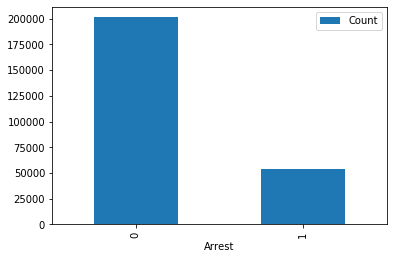

In [58]:
crime_count = pd.DataFrame(data_clean.groupby('Arrest').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()
crime_count.plot(x='Arrest',y='Count',kind='bar')

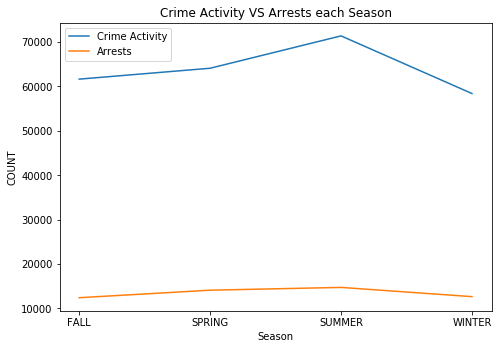

In [63]:
crime_activity = pd.DataFrame(data_clean.groupby('Season').size().rename('Count').reset_index())
arrest_activity = pd.DataFrame(arrest_new.groupby('Season').size().rename('Arrest Count').reset_index())
x=['FALL','SPRING','SUMMER','WINTER']
y=crime_activity['Count']
z=arrest_activity['Arrest Count']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.plot(x,y,label='Crime Activity')
ax.plot(x,z,label='Arrests')
ax.set_ylabel("COUNT")
ax.set_xlabel("Season")
ax.set_title("Crime Activity VS Arrests each Season")
ax.legend()

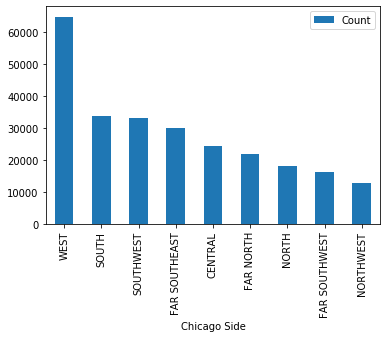

In [65]:
#Chicago side
#West side has the highest amount of crimes
crime_count = pd.DataFrame(data_clean.groupby('Chicago Side').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()
crime_count.plot(x='Chicago Side',y='Count',kind='bar')

In [67]:
#Count of crime in day interval
crime_count = pd.DataFrame(data_clean.groupby('Day Interval').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()

crime_count = pd.DataFrame(data_clean.groupby('Day Name').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()

,Day Name,Count
0,Friday,38389
1,Saturday,37618
2,Wednesday,36445
3,Monday,36153
4,Thursday,35811


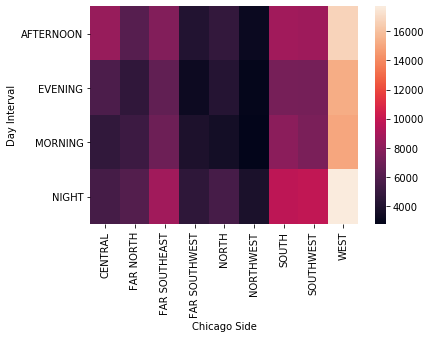

In [69]:

#Heat map for between day and side of chicago
#In each side of chicago the crime rate is mostly high during night and after noon
arrest_side = data_clean[['Chicago Side','Day Interval']]
arrest_side_plot = pd.DataFrame(arrest_side.groupby(['Chicago Side','Day Interval']).size().sort_values(ascending=False).rename('Count').reset_index())
arrest_side_matrix = arrest_side_plot.pivot_table(values='Count',index='Day Interval',columns='Chicago Side')
sns.heatmap(arrest_side_matrix)


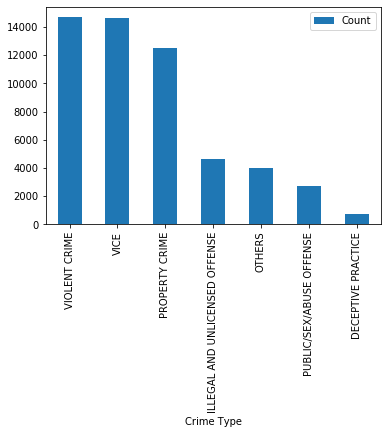

In [71]:
#Arrest count made based upon the type of crime
#Vice crimes have the highest arrest rate
data_clean_new = data_clean[data_clean['Arrest']== 1]
crime_count = pd.DataFrame(data_clean_new.groupby('Crime Type').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()
crime_count.plot(x='Crime Type',y='Count',kind='bar')

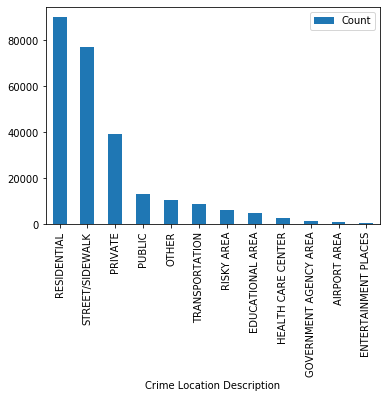

In [73]:
#Crimes on the type of location
crime_count = pd.DataFrame(data_clean.groupby('Crime Location Description').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()
crime_count.plot(x='Crime Location Description',y='Count',kind='bar')

Text(0, 0.5, 'Frequency of Crime')

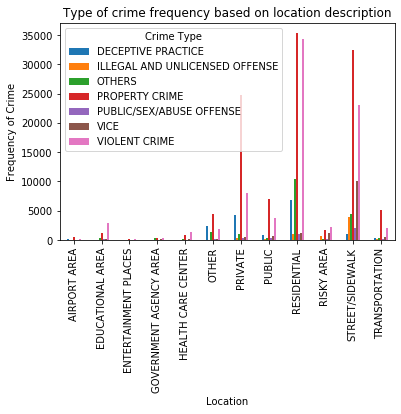

In [76]:
#Type of crime based on location type
pd.crosstab(data_clean['Crime Location Description'],data_clean['Crime Type']).plot(kind='bar')
plt.title('Type of crime frequency based on location description')
plt.xlabel('Location')
plt.ylabel('Frequency of Crime')

In [77]:
#Based on these results, let us consider correlation matrix to find the co-related varibles and eliminate them
data_clean_ini = data_clean.iloc[:,[2,8,9,10,11]]
corr = data_clean_ini.corr()
corr.style.background_gradient(cmap='coolwarm')
#strong correlation between X,Y co-ordinates, Latitude and Longitude observed

,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude
Arrest,1.000000,-0.016249,-0.053800,-0.053613,-0.017215
X Coordinate,-0.016249,1.000000,-0.485656,-0.487991,0.999865
Y Coordinate,-0.053800,-0.485656,1.000000,0.999994,-0.477818
Latitude,-0.053613,-0.487991,0.999994,1.000000,-0.480193
Longitude,-0.017215,0.999865,-0.477818,-0.480193,1.000000


Feature 0: 304.734881
Feature 1: 16152.189911
Feature 2: 1265.413081
Feature 3: 2234.769918
Feature 4: 78439.324970
Feature 5: 0.931068
Feature 6: 10.600784
Feature 7: 0.940901
Feature 8: 1829.061199
Feature 9: 1895.448738
Feature 10: 412.477066


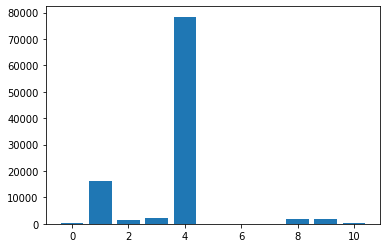

In [78]:
#Chi square analysis
data_clean_chi = data_clean
X_train, X_test, y_train, y_test = train_test_split(data_clean_chi.iloc[:,[3,4,5,6,7,12,13,14,15,16,17]],data_clean_chi['Arrest'],test_size = 0.2, random_state = 42)


# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [83]:
data_feature=data_clean.iloc[:,[2,3,5,15,16,17]]
data_feature_dummy=pd.get_dummies(data=data_feature, columns=['District','Chicago Side','Crime Type','Crime Location Description'])
data_feature_dummy.iloc[:,1:53]

,Domestic,District_1,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,...,Crime Location Description_ENTERTAINMENT PLACES,Crime Location Description_GOVERNMENT AGENCY AREA,Crime Location Description_HEALTH CARE CENTER,Crime Location Description_OTHER,Crime Location Description_PRIVATE,Crime Location Description_PUBLIC,Crime Location Description_RESIDENTIAL,Crime Location Description_RISKY AREA,Crime Location Description_STREET/SIDEWALK,Crime Location Description_TRANSPORTATION
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
258337,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
258338,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
258339,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [84]:
#Building models
#Decision tree
X_train, X_test, y_train, y_test = train_test_split(data_feature_dummy.iloc[:,1:53],data_feature_dummy['Arrest'],test_size = 0.2, random_state = 0)
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

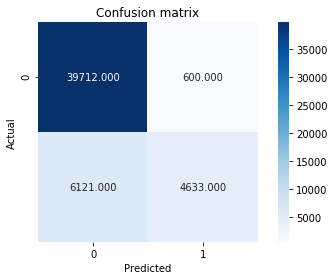

In [85]:
#Accuracy measures for Decision tree
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues,yticklabels=5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

[0.8683860102612305, 0.13161398973876948, array([0.86644994, 0.88534302]), array([0.98511609, 0.43081644]), array([0.92198038, 0.57959592])]


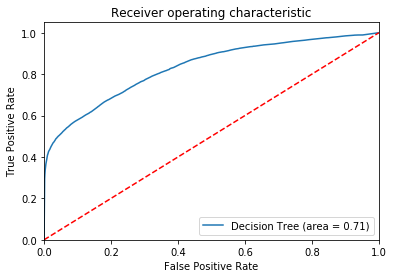

In [87]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

#ROC CURVE for the binary classifier
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [88]:
#RandomForest Classifier
classifier1 = RandomForestClassifier(n_estimators=100, criterion="entropy",random_state = 0)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

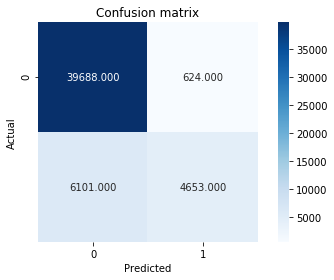

In [89]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues,yticklabels=5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [90]:
#Accuracy measures for Random forest
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

#ROC CURVE for the binary classifier
logit_roc_auc = roc_auc_score(y_test, classifier1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[0.8683076802569224, 0.1316923197430776, array([0.86675839, 0.88175099]), array([0.98452074, 0.43267621]), array([0.92189405, 0.58050028])]
